# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제


은닉층을 깊게 쌓을 수록 DNN의 성능이 상승할 가능성은 높아지지만 DNN을 아무생각 없이 깊게만 쌓는다면 아래와 같은 문제점이 발생하여 학습이 제대로 이루어지지 않아 성능이 하락할 수 있다.

1. Vanishing Gradient
2. 매우 느린 학습속도
3. Overfitting

Vanishing Gradient란, 기울기 소실로 은닉층이 깊어지면 깊어질수록 역전파 알고리즘이 입력층으로 전달됨에 따라서 기울기가 점점 작아져 가중치가 제대로 업데이트 되지 않는 현상으로 최적의 모델을 찾을 없게 된다.

매우 느린 학습속도는 은닉층이 깊어진다는 것은 그만큼 파라미터의 개수가 증가한다는 것이며 모델이 커진다는 것이다. 이에 따라 시간 복잡도가 매우 높아져 학습 속도가 저하되게 된다.

Overfitting란, 과적합을 의미하는데 신경망 알고리즘 자체가 학습 데이터의 크게 의존하는 성향을 가지기 때문에 과적합을 유발시키기가 쉬우며 모델의 성능 또한 하락하게 된다.

위와 같은 DNN의 문제점을 해결하고자 많은 학자들이 연구를 했고 그 결과 Activation Function, Weight Initialization, Batch Normalization, Optimization, Dropout, Regularization 등을 개발하여 해결했다.

아래의 코드는 위에서 언급한 아무 기법도 적용하지 않은 단순하게 은닉층을 3개만 쌓은 신경망을 MNIST 데이터를 통하여 학습시킨 모델이다. 모델은 Test Data에 대하여 정확도가 약 92%의 성능을 보이고 있다.

앞으로 DNN의 문제점을 해결한 다양한 기법을 적용하여 DNN의 성능이 어떻게 바뀌는지를 알아볼 것이다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

In [ ]:
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = False,
                               transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


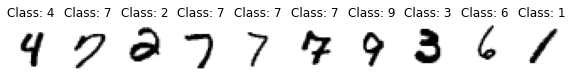

In [ ]:
for (X_train, y_train) in train_loader:
  break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
  plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
def train(model, train_loader):
  model.train()
  train_loss = 0
  correct = 0

  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    prediction = output.max(1, keepdim = True)[1]
    correct += prediction.eq(label.view_as(prediction)).sum().item()
      
  train_loss /= len(train_loader.dataset)
  train_accuracy = 100. * correct / len(train_loader.dataset)
  return train_loss, train_accuracy

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Sequential(
        nn.Linear(28 * 28, 512)
    )
    self.linear2 = nn.Sequential(
        nn.Linear(512, 256)
    )
    self.linear3 = nn.Sequential(
        nn.Linear(256, 128)
    )
    self.linear4 = nn.Sequential(
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    return x

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (linear1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
  )
  (linear2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
  )
  (linear3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
  )
  (linear4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0106, 	Train Accuracy: 66.54 %, 	Test Loss: 0.0045, 	Test Accuracy: 84.44 % 


[EPOCH: 2], 	Train Loss: 0.0036, 	Train Accuracy: 87.16 %, 	Test Loss: 0.0030, 	Test Accuracy: 89.26 % 


[EPOCH: 3], 	Train Loss: 0.0029, 	Train Accuracy: 89.53 %, 	Test Loss: 0.0026, 	Test Accuracy: 90.45 % 


[EPOCH: 4], 	Train Loss: 0.0026, 	Train Accuracy: 90.44 %, 	Test Loss: 0.0025, 	Test Accuracy: 91.05 % 


[EPOCH: 5], 	Train Loss: 0.0025, 	Train Accuracy: 90.93 %, 	Test Loss: 0.0024, 	Test Accuracy: 91.40 % 


[EPOCH: 6], 	Train Loss: 0.0024, 	Train Accuracy: 91.32 %, 	Test Loss: 0.0023, 	Test Accuracy: 91.80 % 


[EPOCH: 7], 	Train Loss: 0.0023, 	Train Accuracy: 91.56 %, 	Test Loss: 0.0023, 	Test Accuracy: 91.69 % 


[EPOCH: 8], 	Train Loss: 0.0023, 	Train Accuracy: 91.71 %, 	Test Loss: 0.0022, 	Test Accuracy: 91.78 % 


[EPOCH: 9], 	Train Loss: 0.0022, 	Train Accuracy: 91.86 %, 	Test Loss: 0.0022, 	Test Accuracy: 91.96 % 


[EPOCH: 10], 	Train Loss: 0.0022, 	Train Accu

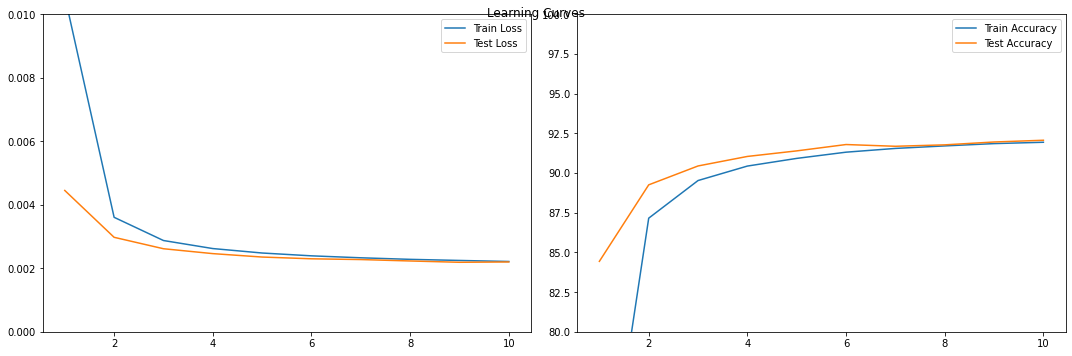

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# Activation Function

활성화 함수는 신경망에서 매우 중요하다. 왜냐하면 활성화 함수가 없다면 신경망은 아무리 층을 깊게 쌓아도 단순한 선형 회귀 모델에 지나지 않게 된다. 하지만 활성화 함수가 존재한다면 비선형의 문제를 해결할 수 있는 모델이 된다. 따라서 위의 코드처럼 활성화 함수를 적용하지 않은 모델은 직선으로만 분류를 할 수 있는 단순한 선형 회귀 모델과 다른 점이 없다.

각 층마다의 특성을 추출할 수 있도록 도와주는 활성화 함수에는 Sigmoid, Tanh, ReLU, Leaky ReLU 등이 존재한다.

### Sigmoid
- 아래의 그림과 같은 형태를 뛰는 시그모이드 함수는 output의 값을 0에서 1사이의 값으로 변환시켜주는 특징을 가진다.




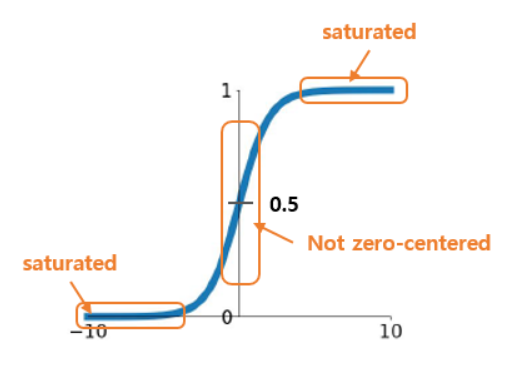

### Tanh
- 아래의 그림과 같은 형태를 뛰는 하이퍼볼릭 탄젠트 함수는 output의 값을 -1에서 1사이의 값으로 변환시켜주는 특징을 가진다.

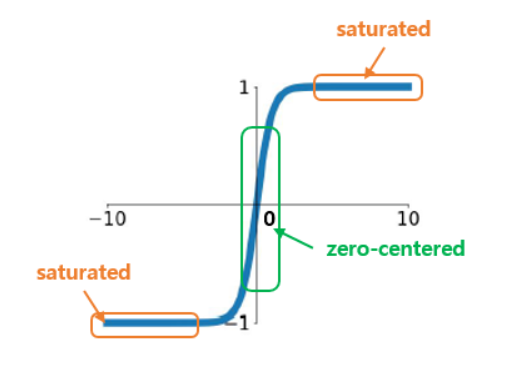

그런데 위에서 설명된 Sigmoid, Tanh 함수를 사용하게 되면 값이 특정 값으로 수렴을 하게 되어 미분이 불가능해지는 상황이 발생하게 된다. 따라서 역전파 알고리즘에 의해 가중치를 초기화 하기 위해서 미분을 통하여 기울기를 구할 때 입력층에 가까워질 수록 아래의 그림과 같이 기울기가 소멸하게 되어 모델이 학습이 제대로 이루어지지 않게 된다. 이러한 기울기 소실 문제를 해결하고자 다른 활성화 함수가 개발되었고 그 결과가 앞으로 설명할 ReLU와 ReLU의 변형들이다.

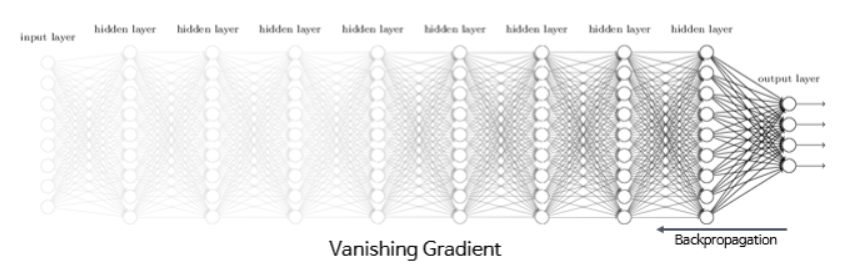

### ReLU
- 아래의 그림과 같은 형태를 뛰는 ReLU 함수는 0 이상인 곳 에서는 수렴하는 구간이 없는 특징을 가진다. 이에 위에서 언급한 함수들의 기울기 소실을 어느 정도 해결할 수 있게 만들어 주었다.

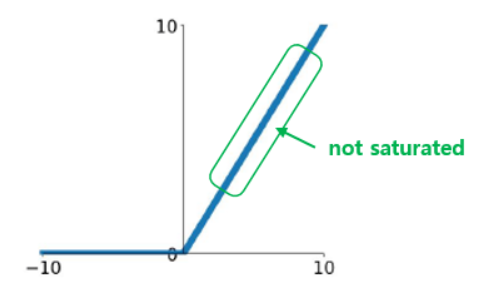

### Leaky ReLU
- 아래의 그림과 같은 형태를 뛰는 Leaky ReLU 함수는 ReLU의 문제점을 해결한 함수이다. ReLU는 일부 뉴런이 0만을 출력하여 활성화되지 않는 dead ReLU라는 문제점을 가지고 있었는데 Leaky ReLU는 0이하의 값에 약간의 기울기를 두어 이러한 문제를 해결하였다.

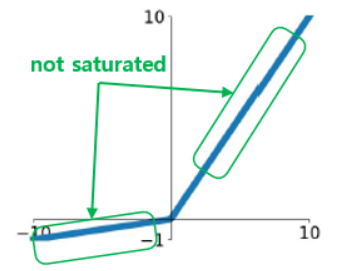

그렇다면 우리는 어떠한 활성하 함수를 써야할까? 이에 대한 해답은 상황에 따라 다르다는 것이다. 각 활성화 함수마다 특징을 가지기 때문에 상황에 맞추어서 활성화 함수를 사용해야한다. cs231n 강의에서는 ReLU를 먼저 쓰고, 그 다음으로 ReLU Family를 쓰라고 하였다.

아래의 코드 기존의 활성화 함수를 적용하지 않은 코드에서 ReLU를 활성화 함수로 추가한 코드이다. 그 결과 Test Data에 대하여 정확도가 약 94.7%의 성능을 보이고 있으며 활성화 함수를 적용하기 전보다 모델의 성능이 더 향상되었음을 알 수 있다.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU()
    )
    self.linear2 = nn.Sequential(
        nn.Linear(512, 256),
        nn.ReLU()
    )
    self.linear3 = nn.Sequential(
        nn.Linear(256, 128),
        nn.ReLU()
    )
    self.linear4 = nn.Sequential(
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    return x

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (linear1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
  )
  (linear2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
  )
  (linear3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
  )
  (linear4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0170, 	Train Accuracy: 32.58 %, 	Test Loss: 0.0135, 	Test Accuracy: 64.11 % 


[EPOCH: 2], 	Train Loss: 0.0068, 	Train Accuracy: 77.68 %, 	Test Loss: 0.0039, 	Test Accuracy: 85.70 % 


[EPOCH: 3], 	Train Loss: 0.0034, 	Train Accuracy: 87.51 %, 	Test Loss: 0.0029, 	Test Accuracy: 89.03 % 


[EPOCH: 4], 	Train Loss: 0.0028, 	Train Accuracy: 89.71 %, 	Test Loss: 0.0025, 	Test Accuracy: 90.66 % 


[EPOCH: 5], 	Train Loss: 0.0025, 	Train Accuracy: 90.92 %, 	Test Loss: 0.0023, 	Test Accuracy: 91.58 % 


[EPOCH: 6], 	Train Loss: 0.0022, 	Train Accuracy: 91.74 %, 	Test Loss: 0.0020, 	Test Accuracy: 92.60 % 


[EPOCH: 7], 	Train Loss: 0.0020, 	Train Accuracy: 92.73 %, 	Test Loss: 0.0018, 	Test Accuracy: 93.21 % 


[EPOCH: 8], 	Train Loss: 0.0018, 	Train Accuracy: 93.45 %, 	Test Loss: 0.0017, 	Test Accuracy: 93.93 % 


[EPOCH: 9], 	Train Loss: 0.0016, 	Train Accuracy: 94.13 %, 	Test Loss: 0.0015, 	Test Accuracy: 94.41 % 


[EPOCH: 10], 	Train Loss: 0.0015, 	Train Accu

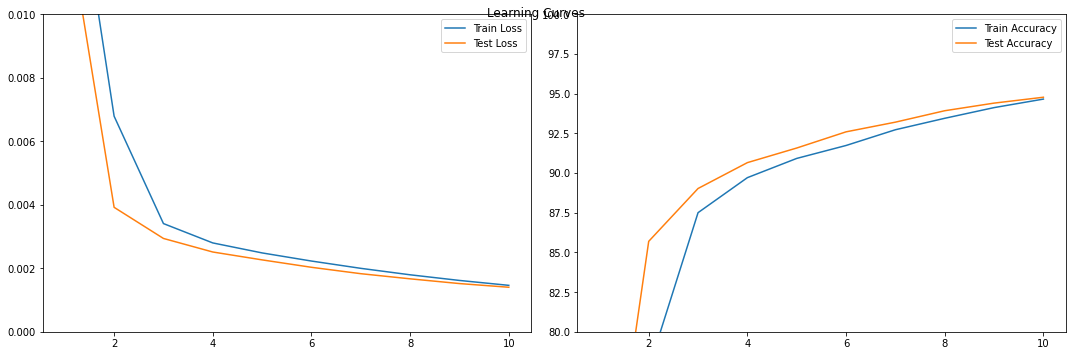

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# Weight Initialization

가중치 초기화는 신경망의 학습에서 매우 중요하다. 가중치의 초기값이 어떤 값을 가지냐에 따라서 학습이 잘될 수도 안될 수도 있다. 따라서 가중치를 초기화하는 방법에 대하여 많은 학자들이 연구를 시작했고 그 결과 Xavier Initialization, He Initialization등이 많이 사용된다.

- Xavier Initialization는 활성화 함수가 선형이라는 가정하에 가중치를 초기화 하는 방식으로 Sigmoid와 Tanh과 결합하였을 때 그 성능이 가장 좋다.

- He Initialization는 ReLU 함수에 적합한 초기값을 구하는 방식으로 ReLU와 결합하였을 때 그 성능이 가장 좋다.

아래의 코드는 위의 코드에서 He Initialization을 적용한 코드로 Test Data에 대하여 정확도가 약 96.6%의 성능을 보이고 있으며 위의 코드보다 성능이 더 향상되었음을 알 수 있다.



In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU()
    )
    self.linear2 = nn.Sequential(
        nn.Linear(512, 256),
        nn.ReLU()
    )
    self.linear3 = nn.Sequential(
        nn.Linear(256, 128),
        nn.ReLU()
    )
    self.linear4 = nn.Sequential(
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    return x

In [ ]:
def weiht_init(model):
  if isinstance(model, nn.Linear):
    torch.nn.init.kaiming_uniform_(model.weight.data)

In [ ]:
model = Net().to(DEVICE)
model.apply(weiht_init)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (linear1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
  )
  (linear2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
  )
  (linear3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
  )
  (linear4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0049, 	Train Accuracy: 83.54 %, 	Test Loss: 0.0024, 	Test Accuracy: 91.01 % 


[EPOCH: 2], 	Train Loss: 0.0022, 	Train Accuracy: 92.11 %, 	Test Loss: 0.0019, 	Test Accuracy: 93.09 % 


[EPOCH: 3], 	Train Loss: 0.0018, 	Train Accuracy: 93.67 %, 	Test Loss: 0.0015, 	Test Accuracy: 94.33 % 


[EPOCH: 4], 	Train Loss: 0.0015, 	Train Accuracy: 94.59 %, 	Test Loss: 0.0014, 	Test Accuracy: 95.06 % 


[EPOCH: 5], 	Train Loss: 0.0013, 	Train Accuracy: 95.30 %, 	Test Loss: 0.0012, 	Test Accuracy: 95.30 % 


[EPOCH: 6], 	Train Loss: 0.0011, 	Train Accuracy: 95.82 %, 	Test Loss: 0.0011, 	Test Accuracy: 95.82 % 


[EPOCH: 7], 	Train Loss: 0.0010, 	Train Accuracy: 96.28 %, 	Test Loss: 0.0010, 	Test Accuracy: 96.22 % 


[EPOCH: 8], 	Train Loss: 0.0009, 	Train Accuracy: 96.65 %, 	Test Loss: 0.0010, 	Test Accuracy: 96.41 % 


[EPOCH: 9], 	Train Loss: 0.0008, 	Train Accuracy: 96.93 %, 	Test Loss: 0.0009, 	Test Accuracy: 96.43 % 


[EPOCH: 10], 	Train Loss: 0.0008, 	Train Accu

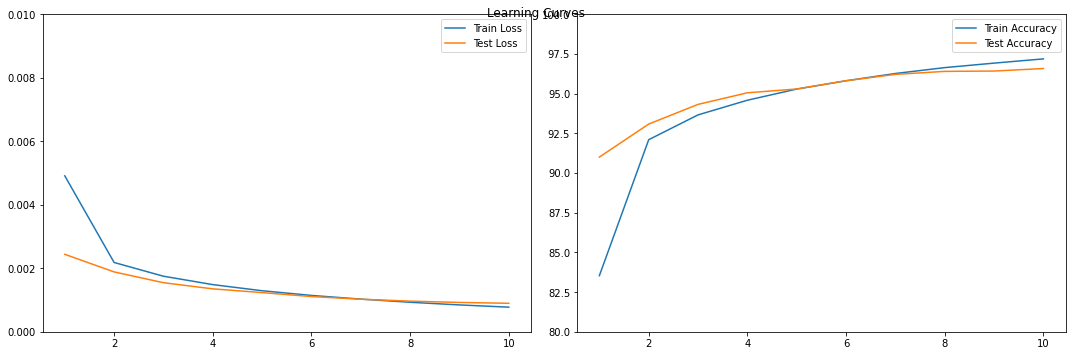

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# Batch Normalization

Batch Normalization은 학습 하는 동안 이전 레이어에서의 가중치 매개변수가 변함에 따라 활성화 하수 출력값의 분포가 변화하는 Internal Covariate Shift 문제를 해결해주는 정규화 기법이다. 배치 정ㄱ화는 미니 배치마다 각 feature별 평균과 분산을 정규화해줌으로써 학습의 안정성을 높여준다.

아래의 코드는 위의 코드에서 Batch Normalization을 적용한 코드로 Test Data에 대하여 정확도가 약 97.2%의 성능을 보이고 있으며 위의 코드보다 성능이 더 향상되었음을 알 수 있다.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU()
    )
    self.linear2 = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU()
    )
    self.linear3 = nn.Sequential(
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU()
    )
    self.linear4 = nn.Sequential(
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    return x

In [ ]:
def weiht_init(model):
  if isinstance(model, nn.Linear):
    torch.nn.init.kaiming_uniform_(model.weight.data)

In [ ]:
model = Net().to(DEVICE)
model.apply(weiht_init)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (linear1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (linear2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (linear3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (linear4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0038, 	Train Accuracy: 86.80 %, 	Test Loss: 0.0019, 	Test Accuracy: 93.81 % 


[EPOCH: 2], 	Train Loss: 0.0016, 	Train Accuracy: 94.25 %, 	Test Loss: 0.0014, 	Test Accuracy: 95.12 % 


[EPOCH: 3], 	Train Loss: 0.0012, 	Train Accuracy: 95.83 %, 	Test Loss: 0.0011, 	Test Accuracy: 96.04 % 


[EPOCH: 4], 	Train Loss: 0.0009, 	Train Accuracy: 96.75 %, 	Test Loss: 0.0010, 	Test Accuracy: 96.30 % 


[EPOCH: 5], 	Train Loss: 0.0008, 	Train Accuracy: 97.36 %, 	Test Loss: 0.0009, 	Test Accuracy: 96.57 % 


[EPOCH: 6], 	Train Loss: 0.0007, 	Train Accuracy: 97.78 %, 	Test Loss: 0.0008, 	Test Accuracy: 96.88 % 


[EPOCH: 7], 	Train Loss: 0.0006, 	Train Accuracy: 98.12 %, 	Test Loss: 0.0008, 	Test Accuracy: 97.03 % 


[EPOCH: 8], 	Train Loss: 0.0005, 	Train Accuracy: 98.41 %, 	Test Loss: 0.0007, 	Test Accuracy: 97.07 % 


[EPOCH: 9], 	Train Loss: 0.0004, 	Train Accuracy: 98.67 %, 	Test Loss: 0.0007, 	Test Accuracy: 97.13 % 


[EPOCH: 10], 	Train Loss: 0.0004, 	Train Accu

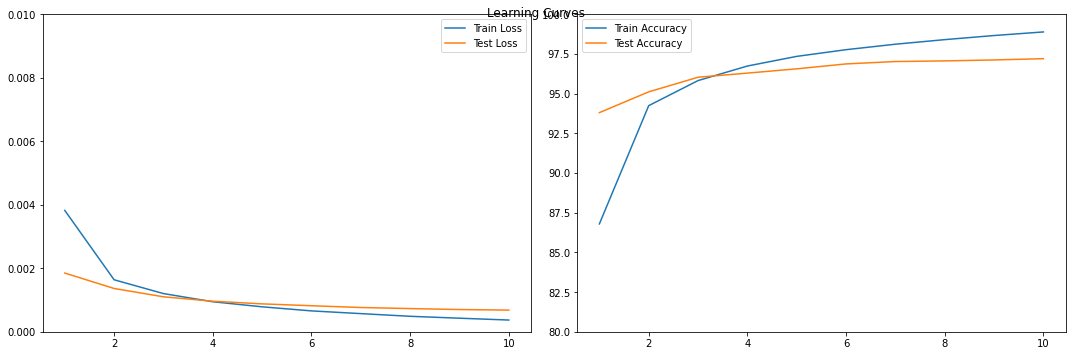

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# Optimization

Optimization은 신경망이 가중치들을 최적화 하능 방법으로 기존에 알고 있던 Gradient Descent가 Optimization의 일종이다.

그런데 우리가 알고 있는 GD의 경우 한가지 큰 문제점이 존재하는데 한번 학습시에 활용되는 데이터가 매우 많다면 속도가 매우 느리게 된다는 문제점이 존재한다. 이에 사람들은 Stochastic Gradient Descent을 개발하여 전체 데이터가 아닌 랜덤하게 추출한 일부 데이터를 사용하여 학습의 속도를 향상시켰다. 아래의 그림은 다양한 Optimization을 쉽게 정리한 것이다.

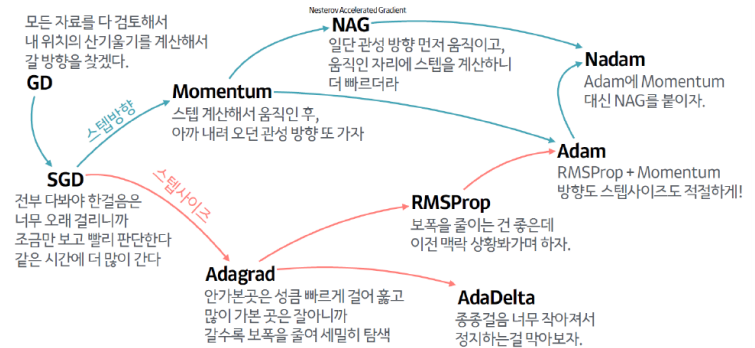

- SGD : 랜덤하게 추출한 일부 데이터를 사용하여 더 빠르게 자주 업데이트 함으로써 속도를 개선하였다.

- Momentum : 관성의 방향을 고려해 이동하고 진동과 폭을 줄임으로써 정확도를 개선하였다.

- NAG :  모멘텀이 이동시킬 방향으로 미리 이동함으로써 불필요한 이동을 개선하여 정확도를 향상시켰다.

- Adagrad : 변수의 업데이트를 자주하며 학습률을 줄여가며 이동 보폭(학습률)을 줄이는 방식이다.

- RMSProp : Adagrad의 보폭 민감도를 보완한 방식이다.

- Adam : Momentum과 RMSProp을 합친 방식으로 정확도와 보폭을 모두 개선하였다.

이 밖에도 다양한 최적화 기법이 존재하며 주어진 상황에 맞게 적절한 최적화 기법을 선택하여 모델의 성능을 향상시켜야 한다.

아래의 코드는 위의 코드에서 Optimization은 Adam으로 변경한 코드로 Test Data에 대하여 정확도가 약 98.22%의 성능을 보이고 있으며 위의 코드보다 성능이 더 향상되었음을 알 수 있다.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU()
    )
    self.linear2 = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU()
    )
    self.linear3 = nn.Sequential(
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU()
    )
    self.linear4 = nn.Sequential(
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    return x

In [ ]:
def weiht_init(model):
  if isinstance(model, nn.Linear):
    torch.nn.init.kaiming_uniform_(model.weight.data)

In [ ]:
model = Net().to(DEVICE)
model.apply(weiht_init)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (linear1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (linear2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (linear3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (linear4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0014, 	Train Accuracy: 94.28 %, 	Test Loss: 0.0009, 	Test Accuracy: 96.15 % 


[EPOCH: 2], 	Train Loss: 0.0007, 	Train Accuracy: 97.15 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.40 % 


[EPOCH: 3], 	Train Loss: 0.0005, 	Train Accuracy: 97.83 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.75 % 


[EPOCH: 4], 	Train Loss: 0.0004, 	Train Accuracy: 98.20 %, 	Test Loss: 0.0005, 	Test Accuracy: 98.08 % 


[EPOCH: 5], 	Train Loss: 0.0003, 	Train Accuracy: 98.71 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.86 % 


[EPOCH: 6], 	Train Loss: 0.0003, 	Train Accuracy: 98.80 %, 	Test Loss: 0.0007, 	Test Accuracy: 97.40 % 


[EPOCH: 7], 	Train Loss: 0.0003, 	Train Accuracy: 98.86 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.75 % 


[EPOCH: 8], 	Train Loss: 0.0002, 	Train Accuracy: 99.07 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.92 % 


[EPOCH: 9], 	Train Loss: 0.0002, 	Train Accuracy: 99.11 %, 	Test Loss: 0.0006, 	Test Accuracy: 98.04 % 


[EPOCH: 10], 	Train Loss: 0.0002, 	Train Accu

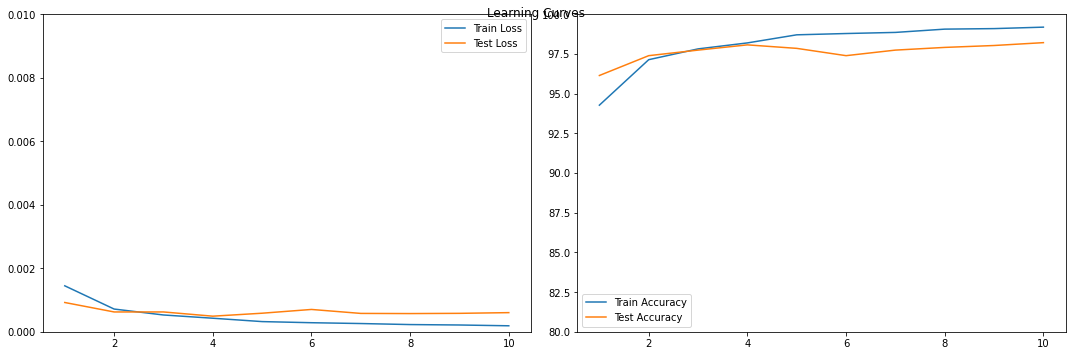

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# Dropout

드롭아웃은 과적합을 방지하는 기법으로 학습 시에 아래의 그림 처럼 임의의 뉴런을 삭제하여 학습하는 방식으로 학습시 weight 동조 현상(다 같은 특징을 추출하는 것)을 방지해줌으로써 과적합 방지와 여러 모델을 앙상블하는 듯한 효과를 가져다 준다.



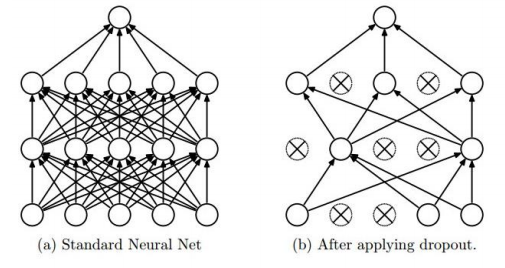

아래의 코드는 위의 코드에서 Dropout을 추가한 코드로 Test Data에 대하여 정확도가 약 98.26%의 성능을 보이고 있으며 위의 코드보다 Train Data에 대하여 성능은 떨어지지만 Test Data에 대하여는 성능이 더 향상되었음을 알 수 있다. 이처럼 Dropout은 Train Data에 의존하는 과적합을 해소해주는 역항을 한다. 

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.linear2 = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.linear3 = nn.Sequential(
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.linear4 = nn.Sequential(
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    return x

In [ ]:
def weiht_init(model):
  if isinstance(model, nn.Linear):
    torch.nn.init.kaiming_uniform_(model.weight.data)

In [ ]:
model = Net().to(DEVICE)
model.apply(weiht_init)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (linear1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (linear2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (linear3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (linear4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0030, 	Train Accuracy: 88.74 %, 	Test Loss: 0.0011, 	Test Accuracy: 95.92 % 


[EPOCH: 2], 	Train Loss: 0.0017, 	Train Accuracy: 93.67 %, 	Test Loss: 0.0008, 	Test Accuracy: 96.98 % 


[EPOCH: 3], 	Train Loss: 0.0014, 	Train Accuracy: 95.01 %, 	Test Loss: 0.0007, 	Test Accuracy: 97.58 % 


[EPOCH: 4], 	Train Loss: 0.0012, 	Train Accuracy: 95.47 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.79 % 


[EPOCH: 5], 	Train Loss: 0.0011, 	Train Accuracy: 95.93 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.74 % 


[EPOCH: 6], 	Train Loss: 0.0011, 	Train Accuracy: 96.11 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.91 % 


[EPOCH: 7], 	Train Loss: 0.0010, 	Train Accuracy: 96.42 %, 	Test Loss: 0.0005, 	Test Accuracy: 98.12 % 


[EPOCH: 8], 	Train Loss: 0.0009, 	Train Accuracy: 96.61 %, 	Test Loss: 0.0005, 	Test Accuracy: 98.16 % 


[EPOCH: 9], 	Train Loss: 0.0009, 	Train Accuracy: 96.75 %, 	Test Loss: 0.0005, 	Test Accuracy: 98.26 % 


[EPOCH: 10], 	Train Loss: 0.0008, 	Train Accu

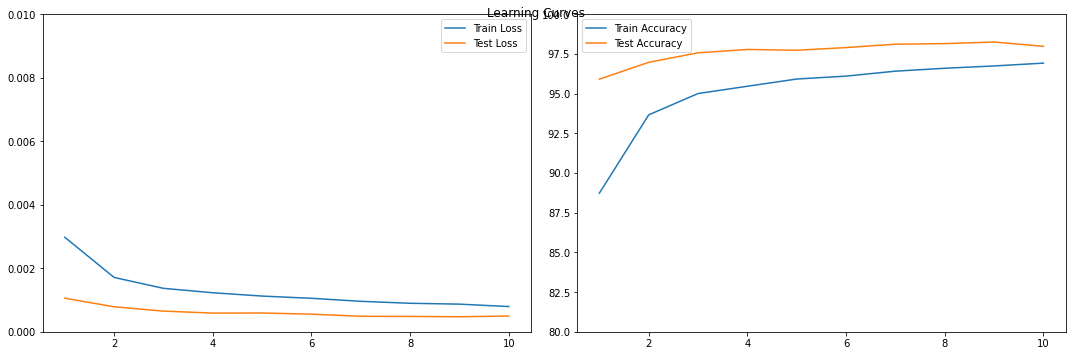

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# Regularization

Regularization는 특정 가중치가 과하게 커지는 것을 방지하는 규제의 역할을 한다.

아래의 코드는 위의 코드에서 Regularization을 추가한 코드로 Train Data와 Test Data 모두 기존 보다 성능이 하락한 것을 알 수 있지만 Train Data보다 Test Data에 대한 성능이 더 높은 것을 알 수 있다. 이를 통하여 Regularization이 과적합을 방지해준다는 것을 알 수 있다. 하지만 Regularization도 튜닝을 통하여 최적의 Regularization 값을 찾아야하며 찾지 못한다면 아래의 코드와 같이 성능이 매우 좋지 못한 모델을 만들 수도 있게 된다. 따라서 하이퍼파리미터 튜닝을 통하여 최적의 Regularization 값을 찾아 최상의 모델을 만들어야 한다.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.linear2 = nn.Sequential(
        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.linear3 = nn.Sequential(
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5)
    )
    self.linear4 = nn.Sequential(
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    return x

In [ ]:
def weiht_init(model):
  if isinstance(model, nn.Linear):
    torch.nn.init.kaiming_uniform_(model.weight.data)

In [ ]:
model = Net().to(DEVICE)
model.apply(weiht_init)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (linear1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (linear2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (linear3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (linear4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0037, 	Train Accuracy: 85.94 %, 	Test Loss: 0.0021, 	Test Accuracy: 92.09 % 


[EPOCH: 2], 	Train Loss: 0.0033, 	Train Accuracy: 87.69 %, 	Test Loss: 0.0022, 	Test Accuracy: 91.73 % 


[EPOCH: 3], 	Train Loss: 0.0033, 	Train Accuracy: 87.75 %, 	Test Loss: 0.0018, 	Test Accuracy: 93.48 % 


[EPOCH: 4], 	Train Loss: 0.0034, 	Train Accuracy: 87.49 %, 	Test Loss: 0.0018, 	Test Accuracy: 93.02 % 


[EPOCH: 5], 	Train Loss: 0.0034, 	Train Accuracy: 87.43 %, 	Test Loss: 0.0018, 	Test Accuracy: 93.03 % 


[EPOCH: 6], 	Train Loss: 0.0034, 	Train Accuracy: 87.36 %, 	Test Loss: 0.0019, 	Test Accuracy: 92.55 % 


[EPOCH: 7], 	Train Loss: 0.0034, 	Train Accuracy: 87.15 %, 	Test Loss: 0.0020, 	Test Accuracy: 92.31 % 


[EPOCH: 8], 	Train Loss: 0.0034, 	Train Accuracy: 87.53 %, 	Test Loss: 0.0021, 	Test Accuracy: 91.81 % 


[EPOCH: 9], 	Train Loss: 0.0034, 	Train Accuracy: 87.23 %, 	Test Loss: 0.0019, 	Test Accuracy: 92.92 % 


[EPOCH: 10], 	Train Loss: 0.0034, 	Train Accu

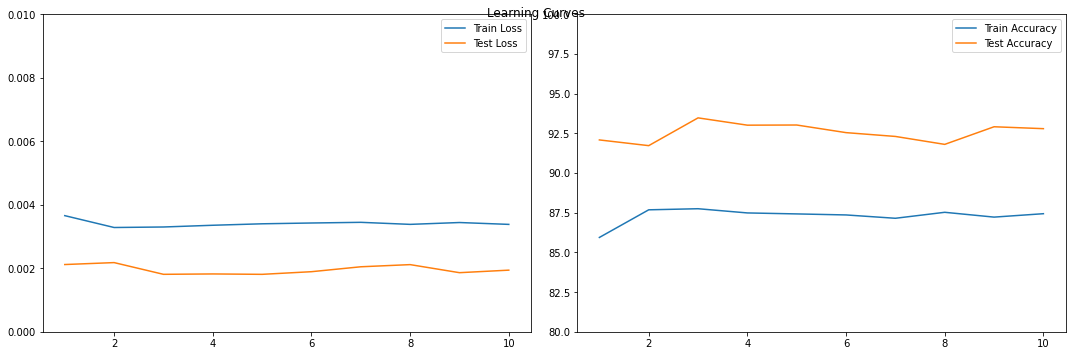

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- T아카데미 Scikit-Learn으로 다지는 머신러닝 기초, 강천성, https://tacademy.skplanet.com/live/player/onlineLectureDetail.action
- Pytorch로 시작하는 딥 러닝 입문, 유원준, https://wikidocs.net/book/2788
- https://ko.wikipedia.org/wiki/%EB%94%A5_%EB%9F%AC%EB%8B%9D#%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EB%AC%B8%EC%A0%9C%EC%A0%90
- https://m.blog.naver.com/bigdata-pro/221805870297
- https://excelsior-cjh.tistory.com/177
- https://excelsior-cjh.tistory.com/178